# Analysis notebook for mapping evaluation

Assumes results generated - see Makefile for details

In [1]:
task = "fbbt-zfa"
#task = "fbbt-wbbt"
#task = "hsapdv-mmusdv"

In [2]:
# Parameters
task = "fbbt-zfa"


In [3]:
import pandas as pd

In [4]:
%run md_utils.py

## Utility SSSOM loading methods

In [5]:
def task_method_sssom_path(method: str):
    if method == "curated":
        dir = "data"
    else:
        dir = "results"
    return f"../{dir}/{method}-{task}.sssom.tsv"

In [6]:
def load_sssom(method):
    path = task_method_sssom_path(method)
    df = pd.read_csv(path, sep="\t", comment="#")
    df["mapping_source"]  = method
    if method == "lexmatch":
        df[["predicate_id"]] = "skos:exactMatch"
    return df.drop_duplicates()

lexmatch = load_sssom("lexmatch")
lexmatch

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:exactMatch,ZFA:0001094,whole organism,semapv:LexicalMatching,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,caro:0000012,lexmatch
1,FBbt:00000001,organism,skos:exactMatch,ZFA:0001094,whole organism,semapv:LexicalMatching,oaklib,0.5,oio:hasRelatedSynonym,rdfs:label,whole organism,lexmatch
2,FBbt:00000004,head,skos:exactMatch,ZFA:0001114,head,semapv:LexicalMatching,oaklib,0.5,rdfs:label,rdfs:label,head,lexmatch
3,FBbt:00000034,egg,skos:exactMatch,ZFA:0001109,oocyte,semapv:LexicalMatching,oaklib,0.5,rdfs:label,oio:hasRelatedSynonym,egg,lexmatch
4,FBbt:00000034,egg,skos:exactMatch,ZFA:0001570,unfertilized egg,semapv:LexicalMatching,oaklib,0.5,rdfs:label,oio:hasExactSynonym,egg,lexmatch
...,...,...,...,...,...,...,...,...,...,...,...,...
333,FBbt:00111203,embryonic/larval superior medial protocerebrum,skos:exactMatch,ZFA:0000014,dorsal aorta,semapv:LexicalMatching,oaklib,0.5,oio:hasNarrowSynonym,oio:hasExactSynonym,da,lexmatch
334,FBbt:00111203,embryonic/larval superior medial protocerebrum,skos:exactMatch,ZFA:0000181,caudal zone of dorsal telencephalon,semapv:LexicalMatching,oaklib,0.5,oio:hasNarrowSynonym,oio:hasExactSynonym,dp,lexmatch
335,FBbt:00111204,embryonic/larval superior clamp,skos:exactMatch,ZFA:0007006,lip,semapv:LexicalMatching,oaklib,0.5,oio:hasRelatedSynonym,rdfs:label,lip,lexmatch
336,FBbt:00111304,adult sex peptide abdominal ganglion neuron,skos:exactMatch,ZFA:0000588,statoacoustic (VIII) ganglion,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,sag,lexmatch


In [7]:
lexmatch.groupby(["subject_match_field", "object_match_field"]).count()

subject_id  subject_label  \
subject_match_field   object_match_field                                 
oio:hasBroadSynonym   oio:hasExactSynonym             6              6   
                      oio:hasRelatedSynonym           1              1   
                      rdfs:label                      6              6   
oio:hasDbXref         oio:hasDbXref                  41             41   
oio:hasDbXref-INVERSE oio:hasDbXref                  11             11   
oio:hasExactSynonym   oio:hasExactSynonym            64             64   
                      oio:hasRelatedSynonym           8              8   
                      rdfs:label                     17             17   
oio:hasNarrowSynonym  oio:hasExactSynonym             2              2   
                      rdfs:label                      2              2   
oio:hasRelatedSynonym oio:hasExactSynonym            37             37   
                      oio:hasRelatedSynonym           8              8   
                      rdfs:label                     17             17   
rdfs:label            oio:hasExactSynonym             9              9   
                      oio:hasRelatedSynonym           7              7   
                      rdfs:label                    102            102   

                                             predicate_id  object_id  \
subject_match_field   object_match_field                               
oio:hasBroadSynonym   oio:hasExactSynonym               6          6   
                      oio:hasRelatedSynonym             1          1   
                      rdfs:label                        6          6   
oio:hasDbXref         oio:hasDbXref                    41         41   
oio:hasDbXref-INVERSE oio:hasDbXref                    11         11   
oio:hasExactSynonym   oio:hasExactSynonym              64         64   
                      oio:hasRelatedSynonym             8          8   
                      rdfs:label                       17         17   
oio:hasNarrowSynonym  oio:hasExactSynonym               2          2   
                      rdfs:label                        2          2   
oio:hasRelatedSynonym oio:hasExactSynonym              37         37   
                      oio:hasRelatedSynonym             8          8   
                      rdfs:label                       17         17   
rdfs:label            oio:hasExactSynonym               9          9   
                      oio:hasRelatedSynonym             7          7   
                      rdfs:label                      102        102   

                                             object_label  \
subject_match_field   object_match_field                    
oio:hasBroadSynonym   oio:hasExactSynonym               6   
                      oio:hasRelatedSynonym             1   
                      rdfs:label                        6   
oio:hasDbXref         oio:hasDbXref                    41   
oio:hasDbXref-INVERSE oio:hasDbXref                    11   
oio:hasExactSynonym   oio:hasExactSynonym              64   
                      oio:hasRelatedSynonym             8   
                      rdfs:label                       17   
oio:hasNarrowSynonym  oio:hasExactSynonym               2   
                      rdfs:label                        2   
oio:hasRelatedSynonym oio:hasExactSynonym              37   
                      oio:hasRelatedSynonym             8   
                      rdfs:label                       17   
rdfs:label            oio:hasExactSynonym               9   
                      oio:hasRelatedSynonym             7   
                      rdfs:label                      102   

                                             mapping_justification  \
subject_match_field   object_match_field                             
oio:hasBroadSynonym   oio:hasExactSynonym                        6   
                      oio:hasRelatedSynonym                      1   
                      rdfs:label    

In [8]:
curated = load_sssom("curated")
curated

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:exactMatch,ZFA:0001094,whole organism,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref,caro:0000012,curated
1,FBbt:00000001,organism,skos:exactMatch,ZFA:0001094,whole organism,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0000468,curated
5,FBbt:00000001,organism,skos:exactMatch,ZFA:0001094,whole organism,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000468,curated
21,FBbt:00000004,head,skos:exactMatch,ZFA:0001114,head,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0000033,curated
25,FBbt:00000004,head,skos:exactMatch,ZFA:0001114,head,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000033,curated
...,...,...,...,...,...,...,...,...,...,...,...,...
1010,FBbt:00100314,duct,skos:exactMatch,ZFA:0005171,duct,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0000058,curated
1014,FBbt:00100314,duct,skos:exactMatch,ZFA:0005171,duct,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000058,curated
1030,FBbt:00111202,anatomical line,skos:exactMatch,ZFA:0001689,anatomical line,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref,caro:0000008,curated
1031,FBbt:10000000,anatomical entity,skos:exactMatch,ZFA:0100000,zebrafish anatomical entity,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0001062,curated


In [9]:
gpt3 = load_sssom("gpt3")
gpt3

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:broadMatch,ZFA:0001094,whole organism,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,caro:0000012,gpt3
1,FBbt:00000004,head,skos:relatedMatch,ZFA:0001114,head,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,rdfs:label,rdfs:label,head,gpt3
2,FBbt:00000034,egg,skos:exactMatch,ZFA:0001109,oocyte,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,rdfs:label,oio:hasRelatedSynonym,egg,gpt3
3,FBbt:00000034,egg,skos:relatedMatch,ZFA:0001570,unfertilized egg,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,rdfs:label,oio:hasExactSynonym,egg,gpt3
4,FBbt:00000035,yolk,skos:relatedMatch,ZFA:0000084,yolk,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,rdfs:label,rdfs:label,yolk,gpt3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,FBbt:00111203,embryonic/larval superior medial protocerebrum,owl:differentFrom,ZFA:0000014,dorsal aorta,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasNarrowSynonym,oio:hasExactSynonym,da,gpt3
274,FBbt:00111203,embryonic/larval superior medial protocerebrum,owl:differentFrom,ZFA:0000181,caudal zone of dorsal telencephalon,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasNarrowSynonym,oio:hasExactSynonym,dp,gpt3
275,FBbt:00111204,embryonic/larval superior clamp,skos:relatedMatch,ZFA:0007006,lip,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasRelatedSynonym,rdfs:label,lip,gpt3
276,FBbt:00111304,adult sex peptide abdominal ganglion neuron,owl:differentFrom,ZFA:0000588,statoacoustic (VIII) ganglion,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,sag,gpt3


In [10]:
gpt4 = load_sssom("gpt4")
gpt4

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:relatedMatch,ZFA:0001094,whole organism,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,caro:0000012,gpt4
1,FBbt:00000004,head,skos:exactMatch,ZFA:0001114,head,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,rdfs:label,rdfs:label,head,gpt4
2,FBbt:00000034,egg,skos:broadMatch,ZFA:0001570,unfertilized egg,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,rdfs:label,oio:hasExactSynonym,egg,gpt4
3,FBbt:00000034,egg,skos:relatedMatch,ZFA:0001109,oocyte,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,rdfs:label,oio:hasRelatedSynonym,egg,gpt4
4,FBbt:00000035,yolk,skos:exactMatch,ZFA:0000084,yolk,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,rdfs:label,rdfs:label,yolk,gpt4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,FBbt:00111203,embryonic/larval superior medial protocerebrum,owl:differentFrom,ZFA:0000014,dorsal aorta,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasNarrowSynonym,oio:hasExactSynonym,da,gpt4
274,FBbt:00111203,embryonic/larval superior medial protocerebrum,owl:differentFrom,ZFA:0000181,caudal zone of dorsal telencephalon,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasNarrowSynonym,oio:hasExactSynonym,dp,gpt4
275,FBbt:00111204,embryonic/larval superior clamp,owl:differentFrom,ZFA:0007006,lip,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasRelatedSynonym,rdfs:label,lip,gpt4
276,FBbt:00111304,adult sex peptide abdominal ganglion neuron,owl:differentFrom,ZFA:0000588,statoacoustic (VIII) ganglion,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,sag,gpt4


In [11]:
pd.concat([gpt3, gpt4]).groupby(["mapping_source", "predicate_id"]).count()

subject_id  subject_label  object_id  \
mapping_source predicate_id                                              
gpt3           owl:differentFrom          80             80         80   
               skos:broadMatch            10             10         10   
               skos:exactMatch            61             61         61   
               skos:narrowMatch           20             20         20   
               skos:relatedMatch         107            107        107   
gpt4           owl:differentFrom         122            122        122   
               skos:broadMatch             4              4          4   
               skos:exactMatch           105            105        105   
               skos:narrowMatch            8              8          8   
               skos:relatedMatch          39             39         39   

                                  object_label  mapping_justification  \
mapping_source predicate_id                                             
gpt3           owl:differentFrom            80                     80   
               skos:broadMatch              10                     10   
               skos:exactMatch              61                     61   
               skos:narrowMatch             20                     20   
               skos:relatedMatch           107                    107   
gpt4           owl:differentFrom           122                    122   
               skos:broadMatch               4                      4   
               skos:exactMatch             105                    105   
               skos:narrowMatch              8                      8   
               skos:relatedMatch            39                     39   

                                  subject_source  object_source  mapping_tool  \
mapping_source predicate_id                                                     
gpt3           owl:differentFrom              80             80            80   
               skos:broadMatch                10             10            10   
               skos:exactMatch                61             61            61   
               skos:narrowMatch               20             20            20   
               skos:relatedMatch             107            107           107   
gpt4           owl:differentFrom             122            122           122   
               skos:broadMatch                 4              4             4   
               skos:exactMatch               105            105           105   
               skos:narrowMatch                8              8             8   
               skos:relatedMatch              39             39            39   

                                  confidence  subject_match_field  \
mapping_source predicate_id                                         
gpt3           owl:differentFrom          80                   80   
               skos:broadMatch            10                   10   
               skos:exactMatch            61                   61   
               skos:narrowMatch           20                   20   
               skos:relatedMatch         107                  107   
gpt4           owl:differentFrom         122                  122   
               skos:broadMatch             4                    4   
               skos:exactMatch           105                  105   
               skos:narrowMatch            8                    8   
               skos:relatedMatch          39                   39   

                                  object_match_field  match_string  
mapping_source predicate_id                                         
gpt3           owl:differentFrom                  80            80  
               skos:broadMatch                    10            10  
               skos:exactMatch                    61            61  
               skos:narrowMatch                   20            20  
               skos:relatedMatch                 107

In [12]:
logmap = load_sssom("logmap")
logmap

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
0,FBbt:00002684,ZFA:0000496,0.73,skos:exactMatch,associated organ,compound organ,logmap
1,FBbt:00007173,ZFA:0009060,0.76,skos:exactMatch,cholinergic neuron,cholinergic neuron,logmap
2,FBbt:00047548,ZFA:0009088,0.57,skos:exactMatch,adult mesothoracic anterior anterior ventral c...,professional antigen presenting cell,logmap
3,FBbt:00004055,ZFA:0005663,0.77,skos:exactMatch,adult dorsal prothoracic nerve,dorsal spinal nerve,logmap
4,FBbt:00000286,ZFA:0005685,0.70,skos:exactMatch,larval dorsal group tracheal branch 1,dG1,logmap
...,...,...,...,...,...,...,...
204,FBbt:00058901,ZFA:0005269,0.65,skos:exactMatch,basalar muscle 49,abductor muscle,logmap
205,FBbt:00004094,ZFA:0005663,0.73,skos:exactMatch,adult dorsal metathoracic nerve,dorsal spinal nerve,logmap
206,FBbt:00003232,ZFA:0009291,0.65,skos:exactMatch,embryonic precursor cell of adult muscle,muscle precursor cell,logmap
207,FBbt:00040005,ZFA:0005907,0.85,skos:exactMatch,synaptic neuropil,tectal neuropile,logmap


In [13]:
def filter_logmap(df, thresh: float):
    return df.query(f"confidence > {thresh}")
filter_logmap(logmap, 0.8)

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
6,FBbt:00000440,ZFA:0000066,0.86,skos:exactMatch,proctodeum,proctodeum,logmap
9,FBbt:00000439,ZFA:0001290,0.86,skos:exactMatch,stomodeum,stomodeum,logmap
11,FBbt:00047097,ZFA:0009242,0.95,skos:exactMatch,primary neuron,primary neuron,logmap
13,FBbt:00001408,ZFA:0009011,0.98,skos:exactMatch,neuroblast X,neuroblast,logmap
15,FBbt:00100359,ZFA:0009361,0.82,skos:exactMatch,serotonergic SP neuron,serotonergic neuron,logmap
...,...,...,...,...,...,...,...
190,FBbt:00004478,ZFA:0005386,0.85,skos:exactMatch,foramen,foramen,logmap
194,FBbt:00005145,ZFA:0009010,0.82,skos:exactMatch,glioblast,glioblast,logmap
202,FBbt:00005098,ZFA:0000142,0.84,skos:exactMatch,peripheral nervous system,peripheral nervous system,logmap
203,FBbt:00005378,ZFA:0000038,0.87,skos:exactMatch,wing margin,margin,logmap


In [14]:
def evaluate(results, gold):
    # filtered = results.query("predicate_id != 'owl:differentFrom'")
    filtered = results.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "object_id"]
    results_set = set([tuple(x) for x in filtered[cols].values])
    gold_set = set([tuple(x) for x in gold[cols].values])

    # Calculate TP, FP, FN
    TP = len(results_set.intersection(gold_set))
    FP = len(results_set.difference(gold_set))
    FN = len(gold_set.difference(results_set))

    # Calculate precision and recall
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    # Calculate F1 score
    F1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return F1, precision, recall

evaluate(gpt3, curated)

(0.5112781954887219, 0.5573770491803278, 0.4722222222222222)

In [15]:
pairs = [(conf, evaluate(filter_logmap(logmap, conf), curated)[0]) for conf in sorted(set(pd.unique(logmap['confidence'])))]
pairs = sorted(pairs, key=lambda x: -x[1])
pairs[0:5]

[(0.74, 0.48618784530386744),
 (0.73, 0.48087431693989074),
 (0.75, 0.48000000000000004),
 (0.72, 0.46808510638297873),
 (0.71, 0.46073298429319376)]

In [16]:
logmap_best = filter_logmap(logmap, pairs[0][0])
logmap_best

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
1,FBbt:00007173,ZFA:0009060,0.76,skos:exactMatch,cholinergic neuron,cholinergic neuron,logmap
3,FBbt:00004055,ZFA:0005663,0.77,skos:exactMatch,adult dorsal prothoracic nerve,dorsal spinal nerve,logmap
6,FBbt:00000440,ZFA:0000066,0.86,skos:exactMatch,proctodeum,proctodeum,logmap
9,FBbt:00000439,ZFA:0001290,0.86,skos:exactMatch,stomodeum,stomodeum,logmap
10,FBbt:00111202,ZFA:0001689,0.75,skos:exactMatch,anatomical line,anatomical line,logmap
...,...,...,...,...,...,...,...
193,FBbt:00001040,ZFA:0001675,0.75,skos:exactMatch,embryonic/larval alary muscle cell,ligament,logmap
194,FBbt:00005145,ZFA:0009010,0.82,skos:exactMatch,glioblast,glioblast,logmap
202,FBbt:00005098,ZFA:0000142,0.84,skos:exactMatch,peripheral nervous system,peripheral nervous system,logmap
203,FBbt:00005378,ZFA:0000038,0.87,skos:exactMatch,wing margin,margin,logmap


In [17]:
def mk_results(dfs):
    combined = pd.concat(dfs)
    objs = []
    for df in dfs:
        methods = set(pd.unique(df["mapping_source"]))
        assert len(methods) == 1
        method = list(methods)[0]
        f1, p, r = evaluate(df, curated)
        objs.append({"method": method, "f1": f1, "P": p, "R": r})
    return pd.DataFrame(objs)
    
  

summary = mk_results([lexmatch, logmap_best, gpt3, gpt4])
#summary.to_markdown(f"main-results-{task}.md")
as_md_table(summary, f"table-main-results-{task}.md")
summary.style.highlight_max(props='font-weight:bold').format(precision=3)

,method,f1,P,R
0,lexmatch,0.349,0.219,0.847
1,logmap,0.486,0.404,0.611
2,gpt3,0.511,0.557,0.472
3,gpt4,0.644,0.543,0.792


In [18]:
import matplotlib.pyplot as plt

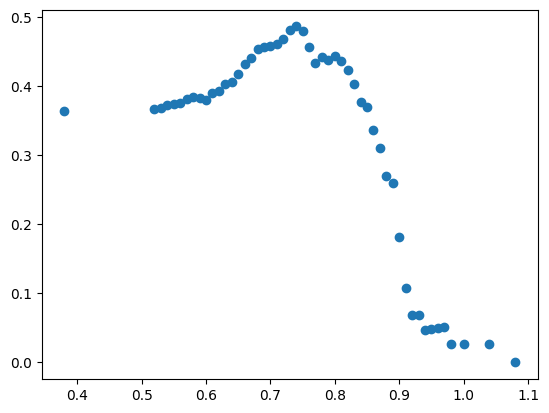

In [19]:
x, y = zip(*pairs)

# Create a scatter plot
plt.scatter(x, y)

# Show the plot
plt.show()

In [20]:
import seaborn as sns

/Users/matentzn/.pyenv/versions/3.10.4/envs/mappergpt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/matentzn/.pyenv/versions/3.10.4/envs/mappergpt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


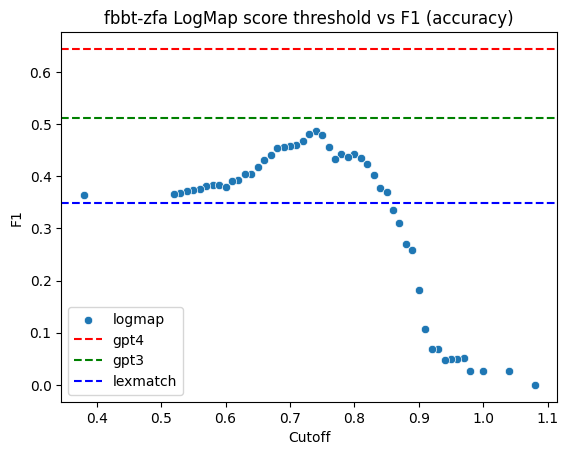

In [21]:
df = pd.DataFrame(pairs, columns=['Cutoff', 'F1'])

# Create a scatter plot
sns.scatterplot(data=df, x='Cutoff', y='F1', label="logmap")

lines = [(gpt4, "gpt4", "red"), (gpt3, "gpt3", "green"), (lexmatch, "lexmatch", "blue")]

for r, label, color in lines:
    plt.axhline(evaluate(r, curated)[0], color=color, linestyle='--', label=label)

plt.legend()

# Adding labels
plt.xlabel('Cutoff')
plt.ylabel('F1')
plt.title(f'{task} LogMap score threshold vs F1 (accuracy)')

plt.savefig(f"../content/images/logmap-scatter-plot-{task}.pdf", format='pdf')

# Show the plot
plt.show()

In [22]:
import plotly

In [23]:
import plotly.io as pio
pio.renderers.default='notebook'

In [24]:
plt.savefig(f"logmap-scatter-plot-{task}.pdf", format='pdf')

<Figure size 640x480 with 0 Axes>

In [25]:
plt.savefig(f"logmap-scatter-plot-{task}.png", format='png')

<Figure size 640x480 with 0 Axes>

In [26]:
def diffs(x, y):
    x2 = x.query("predicate_id == 'skos:exactMatch'")
    y2 = y.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "subject_label", "object_id", "object_label"]
    xset = set([tuple(v) for v in x2[cols].values])
    yset = set([tuple(v) for v in y2[cols].values])
    return xset-yset

diffs(logmap_best, gpt4)

{('FBbt:00000001', 'organism', 'ZFA:0001094', 'whole organism'),
 ('FBbt:00000381',
  'larval lateral G tracheal branch 10',
  'ZFA:0005702',
  'lg1'),
 ('FBbt:00001040',
  'embryonic/larval alary muscle cell',
  'ZFA:0001675',
  'ligament'),
 ('FBbt:00001061', 'ventral neurectoderm', 'ZFA:0001120', 'neuroectoderm'),
 ('FBbt:00001408', 'neuroblast X', 'ZFA:0009011', 'neuroblast'),
 ('FBbt:00001573', 'EN neuron', 'ZFA:0009248', 'neuron'),
 ('FBbt:00003144',
  'adult posterior hindgut',
  'ZFA:0000706',
  'posterior intestine'),
 ('FBbt:00004055',
  'adult dorsal prothoracic nerve',
  'ZFA:0005663',
  'dorsal spinal nerve'),
 ('FBbt:00004179', 'sacculus', 'ZFA:0000428', 'saccule'),
 ('FBbt:00004191', 'cornea', 'ZFA:0000640', 'cornea'),
 ('FBbt:00004200', 'retina', 'ZFA:0000152', 'retina'),
 ('FBbt:00004499',
  'occipital foramen',
  'ZFA:0005892',
  'lateral occipital foramen'),
 ('FBbt:00004860', 'germline cell', 'ZFA:0009016', 'germ line cell'),
 ('FBbt:00004873', 'female germline stem